In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv("C:\\Users\\SAMSUNG\\Documents\\vscode\\2024\\ML\\Datasets\\pima_diabetes.csv")
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_12392\1358084014.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [2]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 156)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]


C:\Users\SAMSUNG\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
def get_clf_eval(y_test, pred , pred_proba):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1score = f1_score(y_test,pred)
    auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율: {recall:.4f} , f1 : {f1score:.4f} , AUC:{auc:.4f}')

In [4]:
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[84 13]
 [25 32]]
정확도:0.7532, 정밀도:0.7111, 재현율: 0.5614 , f1 : 0.6275 , AUC:0.8410


In [11]:
import matplotlib.pyplot as plt
def precision_recall_curve_plot(y_test, pred_proba):
    precision, recall, thresholds = precision_recall_curve(y_test, pred_proba)
    # print(len(recall))
    # matplotlib.pyplot.plot
    plt.plot(thresholds , precision[:-1] , 'b--' , label="precision")
    plt.plot(thresholds , recall[:-1] , 'r-', label="recall")
    plt.xlabel("thresholds")
    plt.ylabel("precsion & recall")
    plt.legend()
    plt.show()

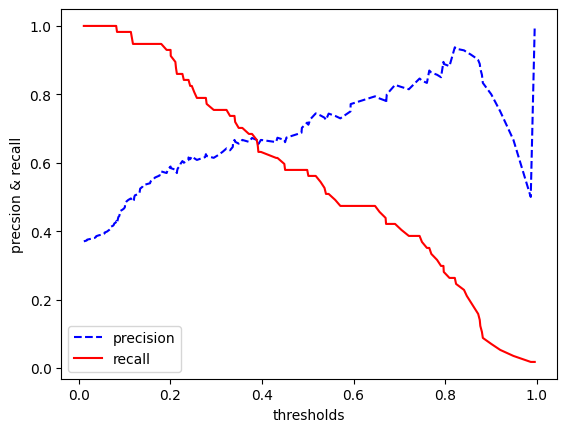

In [12]:
precision_recall_curve_plot(y_test, pred_proba)

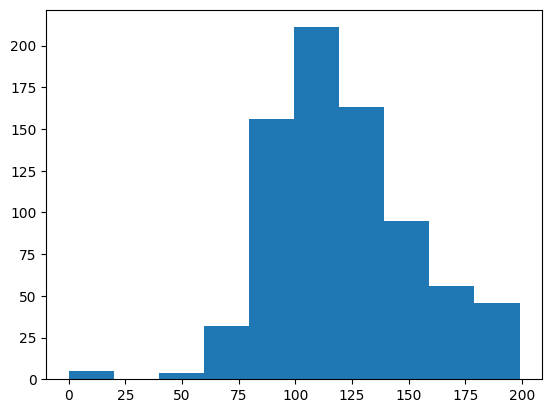

In [13]:
plt.hist(diabetes_data['Glucose'], bins=10)
plt.show()

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [19]:
lr_clf.fit(scaled_X_train, y_train)
scaled_pred = lr_clf.predict(scaled_X_test)
scaled_pred_proba = lr_clf.predict_proba(scaled_X_test)[:,1]

In [20]:
get_clf_eval(y_test , pred , pred_proba)

오차행렬
[[84 13]
 [25 32]]
정확도:0.7532, 정밀도:0.7111, 재현율: 0.5614 , f1 : 0.6275 , AUC:0.8410


In [21]:
get_clf_eval(y_test , scaled_pred , scaled_pred_proba)

오차행렬
[[86 11]
 [25 32]]
정확도:0.7662, 정밀도:0.7442, 재현율: 0.5614 , f1 : 0.6400 , AUC:0.8403
